In [119]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import Transformer 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [120]:
import importlib

importlib.reload(Transformer)

output_dim = 2  # To begin with we can use a Gaussian with mean and variance
d_model = 1
num_heads = 1
num_layers = 2
d_ff = 2048
max_seq_length = 100
dropout = 0.1

transformer = Transformer.Decoder_Transformer(
    # embedding_size,
    output_dim,
    d_model,
    num_heads,
    num_layers,
    d_ff,
    max_seq_length,
    dropout,
)

# prediction = transformer.generate(times[0].unsqueeze(0), 10)
# plt.plot(prediction.squeeze().detach().numpy())

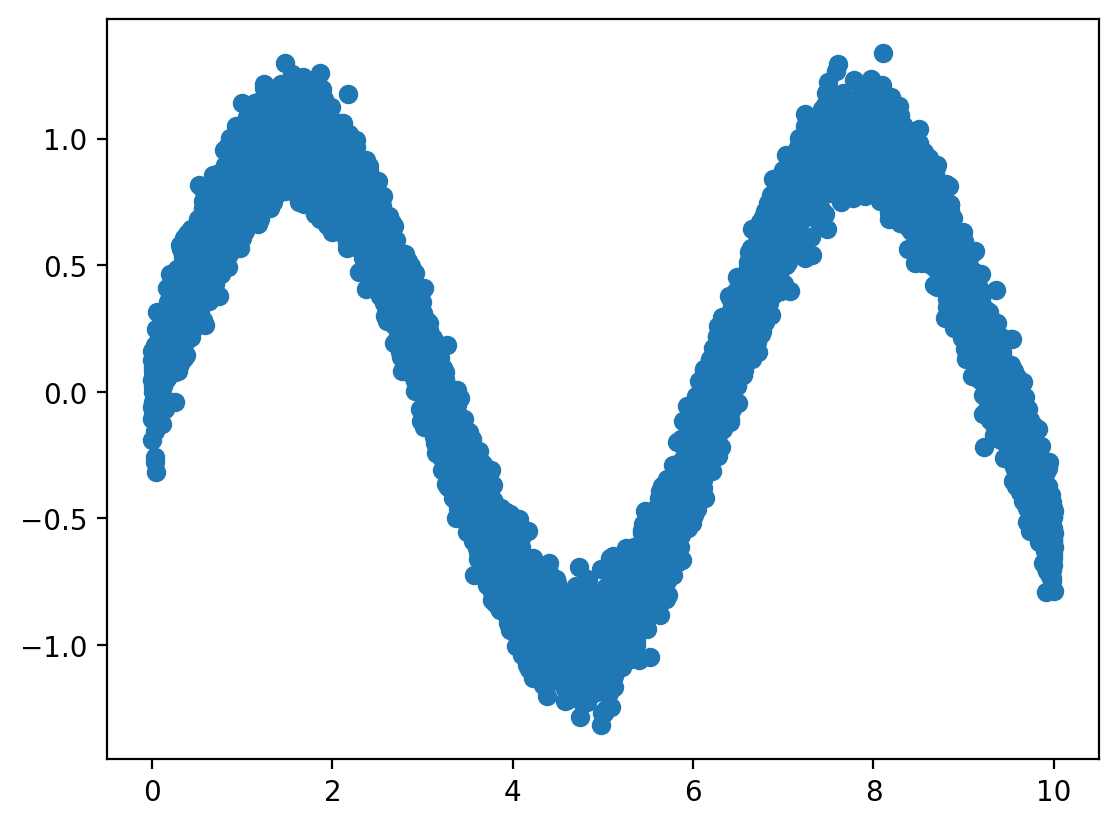

In [121]:
# Ok lets generate some fake time series data
n_data = 10_000
t = np.linspace(0, 10, n_data)
y1 = np.sin(t) + np.random.normal(0, 0.1, n_data)

# Lets plot it
plt.scatter(t, y1)
plt.show()

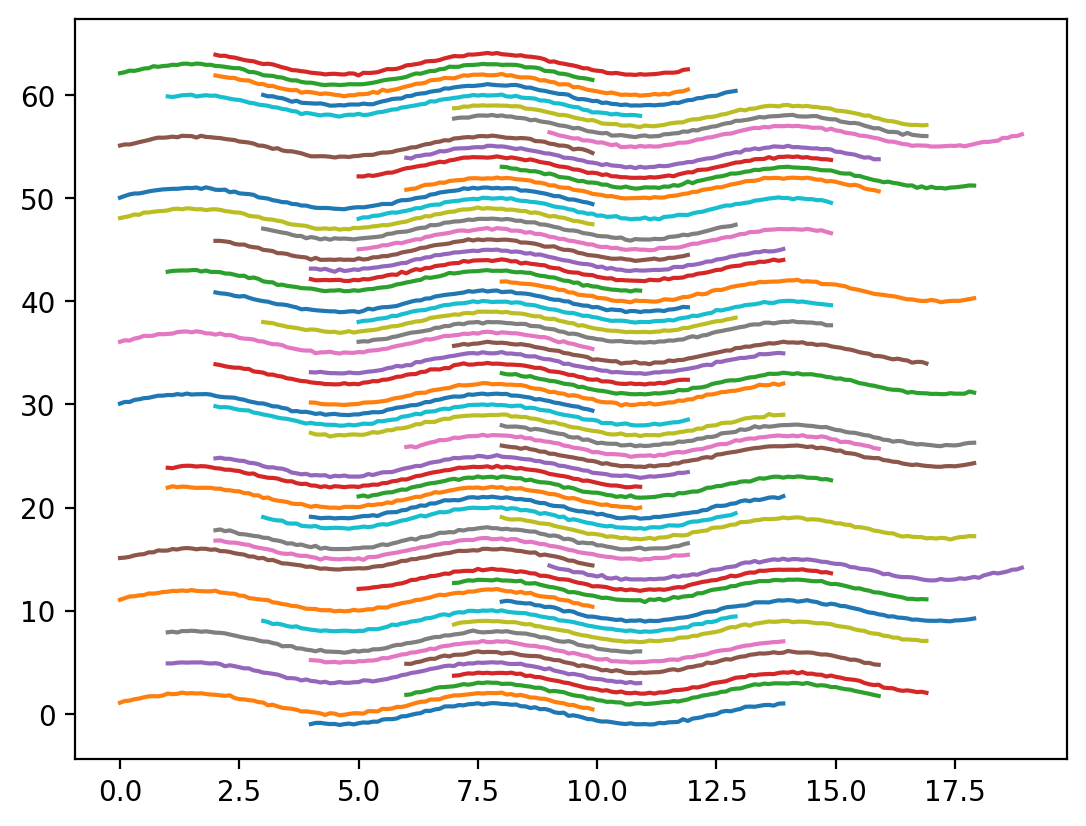

In [122]:
# We now need to package this up into random subsets of time series data
batch_size = 64


def gen_training_data(batch_size):
    # Generate random start points
    start_points = torch.randint(0, 10, (batch_size,))
    batch_times = torch.stack(
        [
            torch.linspace(
                start_point.item(), start_point.item() + 10, max_seq_length + 1
            )
            for start_point in start_points
        ]
    )
    y_vals = torch.stack(
        [
            torch.sin(batch_time) + torch.randn(max_seq_length + 1) * 0.05
            for batch_time in batch_times
        ]
    )
    # The v values for the training should be the next data point
    return batch_times[:, :max_seq_length].unsqueeze(-1), y_vals[:, 1:]


times, y = gen_training_data(batch_size)
for i in range(batch_size):
    plt.plot(times[i], y[i] + i)
plt.show()

In [123]:
# Check that the transformer can take the inputs
print(transformer(times).shape)

torch.Size([64, 100, 2])


tensor([[0.1958, 0.1958, 0.1958,  ..., 0.1958, 0.1958, 0.1958],
        [0.1958, 0.1958, 0.1958,  ..., 0.1958, 0.1958, 0.1958],
        [0.1958, 0.1958, 0.1958,  ..., 0.1958, 0.1958, 0.1958],
        ...,
        [0.1958, 0.1958, 0.1958,  ..., 0.1958, 0.1958, 0.1958],
        [0.1958, 0.1958, 0.1958,  ..., 0.1958, 0.1958, 0.1958],
        [0.1958, 0.1958, 0.1958,  ..., 0.1958, 0.1958, 0.1958]],
       grad_fn=<SelectBackward0>) tensor([[-0.9845, -0.8750, -0.8667,  ...,  0.8052,  0.9937,  1.0134],
        [ 0.0857,  0.2551,  0.2907,  ..., -0.4088, -0.4106, -0.5521],
        [-0.1519, -0.1021,  0.0918,  ..., -0.0471, -0.1618, -0.2580],
        ...,
        [ 0.9016,  0.8107,  0.7363,  ..., -0.6658, -0.6319, -0.4670],
        [ 0.1164,  0.2100,  0.3636,  ..., -0.3516, -0.4260, -0.5338],
        [ 0.9081,  0.8001,  0.8105,  ..., -0.7682, -0.5615, -0.5084]])
Epoch: 1, Loss: 0.3817076086997986
tensor([[0.1943, 0.1943, 0.1943,  ..., 0.1943, 0.1943, 0.1943],
        [0.1943, 0.1943, 0.1943,  .

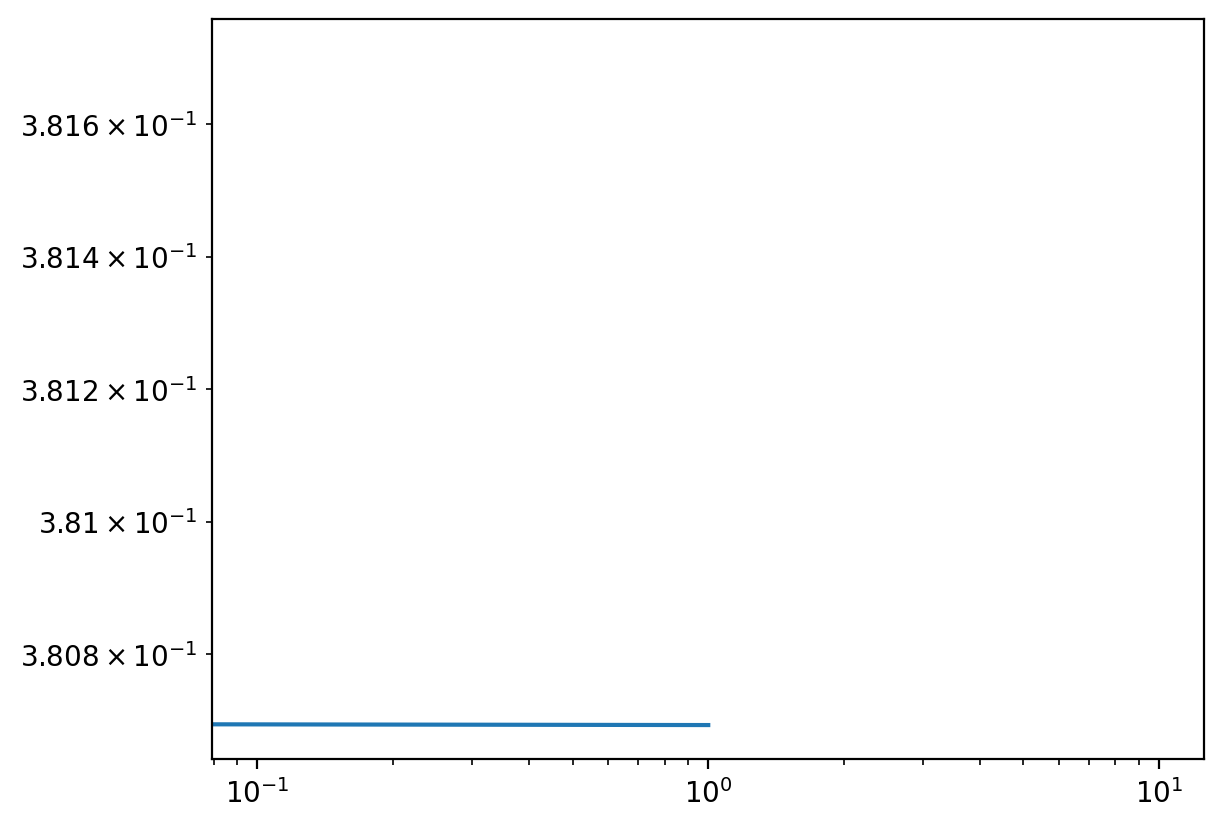

In [131]:
optimizer = optim.Adam(transformer.parameters(), lr=0.001)


def Gaussian_loss(transformer_pred, y_true):
    # Here we assume that the transformer output is a Gaussian with mean and variance

    # First we need to split the output into the mean and variance
    mean = transformer_pred[:, :, 0]
    var = transformer_pred[:, :, 1]

    # Now we can calculate the loss
    loss = torch.mean((y_true - mean) ** 2 / var + torch.log(var))

    return loss


transformer.train()

losses = []

for epoch in range(2):
    optimizer.zero_grad()
    output = transformer(times)
    loss = Gaussian_loss(output, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

plt.loglog(losses)

tensor([[0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131, 0.2131,
         0.2131]], grad_fn=<StackBackward0>)


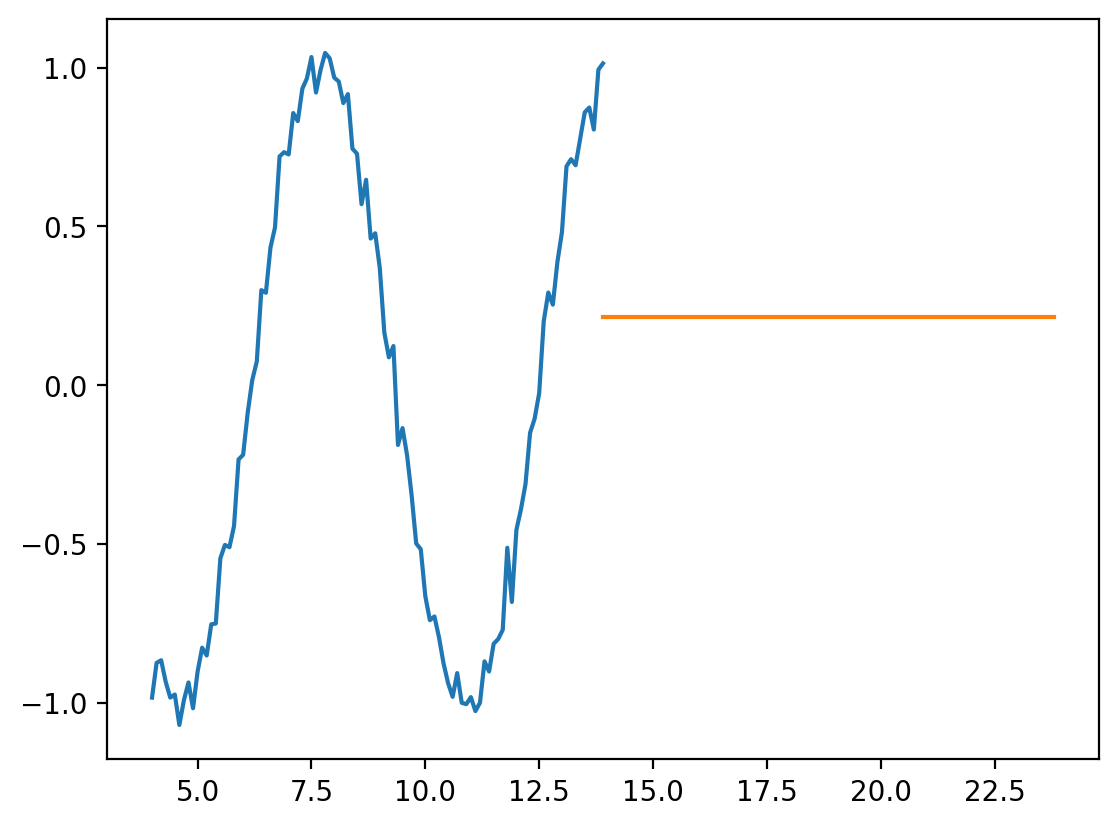

In [128]:
sequence_length = 100

prediction = transformer.generate(times[0].unsqueeze(0), sequence_length)
print(prediction)

plt.plot(times[0], y[0])
T = torch.max(times[0]).numpy() - torch.min(times[0]).numpy()
plt.plot(
    np.linspace(0, T, sequence_length) + torch.max(times[0]).numpy(),
    prediction.squeeze().detach().numpy(),
)